In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Data Loading
data = np.genfromtxt('sgd_data.txt',delimiter = ',')
x = np.zeros((40,1), dtype = np.float)
y = np.zeros((40,1), dtype = np.float)
for i in range(data.shape[0]):
    x[i] = data[i][0]
for i in range(data.shape[0]):
    y[i] = data[i][1]
print("Input data shape = {}".format(x.shape))
print("Output data shape = {}".format(y.shape))

Input data shape = (40, 1)
Output data shape = (40, 1)


In [3]:
#Helper Functions
def f(x,w,b):
    '''Sigmoid Function'''
    f = 1/(1+np.exp(-(w*x+b)))
    return f
def mse(x,y,w,b):
    '''Mean Squared Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += 0.5*(y[i]-f(x[i],w,b))**2
    return L
def cross_entropy(x,y,w,b):
    '''Cross Entropy Loss Function'''
    L = 0.0
    for i in range(x.shape[0]):
        L += -(y[i]*np.log(f(x[i],w,b)))
    return L
def grad_w_mse(x,y,w,b):
    fx = f(x,w,b) 
    dw = (fx - y)*fx*(1-fx)*x
    return dw
def grad_b_mse(x,y,w,b):
    fx = f(x,w,b) 
    db = (fx - y)*fx*(1-fx)
    return db
def grad_w_cross(x,y,w,b):
    fx = f(x,w,b) 
    dw = (- y)*(1-fx)*x
    return dw
def grad_b_cross(x,y,w,b):
    fx = f(x,w,b) 
    db = (- y)*(1-fx)
    return db

In [4]:
#Mini Batch Nesterov accelerated Gradient Discent
def Nesterov_GD(x,y,epochs,batch_size,loss,eta,lr):
    w = np.random.randn()
    b = np.random.randn()
    prev_w_look_ahead,prev_b_look_ahead = 0,0
    points = 0
    l_list = []
    w_list = []
    b_list = []
    ep = [i for i in range(epochs+1)]
    dw_look_ahead,db_look_ahead = 0,0
    #First Look Ahead Point
    w_look_ahead = w - lr*prev_w_look_ahead                      #W_look_ahead = w_t - lr*w_update_t-1
    b_look_ahead = b - lr*prev_b_look_ahead                      #B_look_ahead = b_t - lr*b_update_t-1
    for i in range(epochs+1):
        dw_look_ahead,db_look_ahead = 0,0
        for j in range(x.shape[0]):
            #Gradients w.r.t Look Ahead Points
            if (loss == 'mse'):
                dw_look_ahead += grad_w_mse(x[j],y[j],w_look_ahead,b_look_ahead)      
                db_look_ahead += grad_b_mse(x[j],y[j],w_look_ahead,b_look_ahead)
            elif (loss == 'cross_entropy'):
                dw_look_ahead += grad_w_cross(x[j],y[j],w_look_ahead,b_look_ahead)
                db_look_ahead += grad_b_cross(x[j],y[j],w_look_ahead,b_look_ahead)
            points += 1
            if(points % batch_size == 0):
                updated_w = lr*prev_w_look_ahead + eta*dw_look_ahead         #w_update_t = lr*w_update_t-1 + eta*gradient(w_look_ahead)
                updated_b = lr*prev_b_look_ahead + eta*db_look_ahead         #b_update_t = lr*b_update_t-1 + eta*gradient(b_look_ahead)
                w = w - updated_w                                            #W_(t+1) = w_t - w_update_t
                b = b - updated_w                                            #B_(t+1) = b_t - b_update_t
                prev_w_look_ahead = updated_w
                prev_b_look_ahead = updated_b
                #New Look Ahead point after mini batch parameter update
                w_look_ahead = w - lr*prev_w_look_ahead                     
                b_look_ahead = b - lr*prev_b_look_ahead
                dw_look_ahead,db_look_ahead = 0,0
        if (loss == 'mse'):
            print('Loss after {}th epoch = {}\n'.format(i,mse(x,y,w,b)[0]))
            l_list.append(mse(x,y,w,b)[0])
        elif (loss == 'cross_entropy'):
            print('Loss after {}th epoch = {}\n'.format(i,cross_entropy(x,y,w,b)[0]))
            l_list.append(cross_entropy(x,y,w,b)[0])
        w_list.append(w[0])
        b_list.append(b[0])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch Curve\nAlgotithm : Nesterov Accelerated Gradient Decent\nBatch Size = {}\nLearning Rate(Gamma) = {}\nEta = {}\nLoss Function = {}'.format(batch_size,lr,eta,loss))
    plt.plot(ep,l_list)
    plt.show()
    return w_list,b_list

Loss after 0th epoch = 18.649387304803447

Loss after 1th epoch = 18.50228440228616

Loss after 2th epoch = 18.178281836561766

Loss after 3th epoch = 15.731081299890697

Loss after 4th epoch = 0.3512293890354486

Loss after 5th epoch = 0.30366330723897805

Loss after 6th epoch = 0.27526852292310006

Loss after 7th epoch = 0.25590579332109425

Loss after 8th epoch = 0.24165047913102441

Loss after 9th epoch = 0.23061588891639728

Loss after 10th epoch = 0.2217675868209981

Loss after 11th epoch = 0.21448500784942892

Loss after 12th epoch = 0.20837040853108996

Loss after 13th epoch = 0.20315550243526811

Loss after 14th epoch = 0.19865178031765993

Loss after 15th epoch = 0.19472227069139678

Loss after 16th epoch = 0.19126461570457365

Loss after 17th epoch = 0.18820047764497455

Loss after 18th epoch = 0.1854686615001379

Loss after 19th epoch = 0.1830205084564977

Loss after 20th epoch = 0.18081672566492016

Loss after 21th epoch = 0.178825151748909

Loss after 22th epoch = 0.17701

Loss after 240th epoch = 0.158158391074393

Loss after 241th epoch = 0.15816485051881335

Loss after 242th epoch = 0.15817120423575576

Loss after 243th epoch = 0.15817745377273942

Loss after 244th epoch = 0.15818360066131545

Loss after 245th epoch = 0.1581896464169649

Loss after 246th epoch = 0.15819559253901191

Loss after 247th epoch = 0.15820144051054894

Loss after 248th epoch = 0.15820719179837608

Loss after 249th epoch = 0.15821284785295225

Loss after 250th epoch = 0.15821841010835794

Loss after 251th epoch = 0.15822387998226953

Loss after 252th epoch = 0.15822925887594388

Loss after 253th epoch = 0.1582345481742138

Loss after 254th epoch = 0.1582397492454922

Loss after 255th epoch = 0.1582448634417867

Loss after 256th epoch = 0.15824989209872195

Loss after 257th epoch = 0.15825483653557088

Loss after 258th epoch = 0.15825969805529388

Loss after 259th epoch = 0.15826447794458526

Loss after 260th epoch = 0.15826917747392694

Loss after 261th epoch = 0.1582737978976

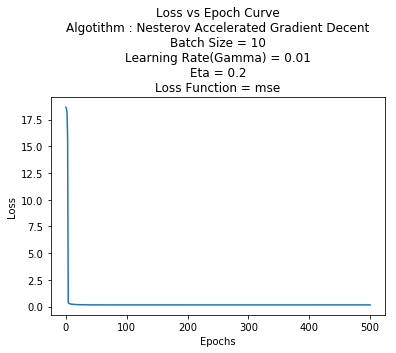

In [5]:
W,B = Nesterov_GD(x,y,500,10,'mse',0.2,0.01)

In [6]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[-1.2310325714641497, -1.0707456033437728, -0.83816316448367845, -0.326858578803081, 0.86950597445804745, 1.0110547538083394, 1.1247834728207646, 1.2217724539183044, 1.3073648677841894, 1.3846025823432679, 1.4553975033113191, 1.521035520315736, 1.5824260638916992, 1.6402381659121346, 1.694980060665229, 1.7470483449210716, 1.7967596720703978, 1.8443719163307364, 1.8900987273274743, 1.9341197944839206, 1.9765882467802831, 2.0176360926934542, 2.057378290611843, 2.0959158440870325, 2.1333381909123141, 2.1697250729009654, 2.2051480183364842, 2.2396715316894866, 2.2733540593322989, 2.3062487818221311, 2.3384042704017993, 2.3698650360592803, 2.4006719927066689, 2.4308628510466015, 2.4604724559814097, 2.4895330776326956, 2.5180746639270057, 2.5461250610889903, 2.5737102071390652, 2.6008543025255104, 2.6275799612632693, 2.6539083453535439, 2.6798592847824185, 2.7054513850154254, 2.7307021235971951, 2.7556279372152281, 2.7802443003822161, 2.8045657967228714, 2.8286061837116296, 2.

Loss after 0th epoch = 2.44221427885621

Loss after 1th epoch = 2.3754422008069747

Loss after 2th epoch = 2.3267061436351284

Loss after 3th epoch = 2.2898740821102557

Loss after 4th epoch = 2.2613369727517347

Loss after 5th epoch = 2.238814146444868

Loss after 6th epoch = 2.2207852830964634

Loss after 7th epoch = 2.206193893503235

Loss after 8th epoch = 2.1942810458728093

Loss after 9th epoch = 2.1844866665481555

Loss after 10th epoch = 2.176388162538317

Loss after 11th epoch = 2.1696607406328914

Loss after 12th epoch = 2.164050891712056

Loss after 13th epoch = 2.159358160165465

Loss after 14th epoch = 2.155422294097677

Loss after 15th epoch = 2.1521139877225473

Loss after 16th epoch = 2.149328081072202

Loss after 17th epoch = 2.146978477708637

Loss after 18th epoch = 2.144994287367153

Loss after 19th epoch = 2.143316857662796

Loss after 20th epoch = 2.141897461642164

Loss after 21th epoch = 2.1406954763734034

Loss after 22th epoch = 2.139676934211503

Loss after 2

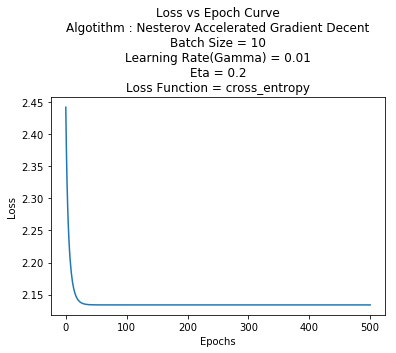

In [11]:
W,B = Nesterov_GD(x,y,500,10,'cross_entropy',0.2,0.01)

In [12]:
print('Weight list = \n{}'.format(W))
print('\n\nBias list = \n{}'.format(B))

Weight list = 
[1.6152373153735105, 1.6606625630654293, 1.6958123712389792, 1.723596463509137, 1.7458965424139263, 1.7640001189399106, 1.7788257506709277, 1.7910501189782613, 1.8011844342555217, 1.8096227549304602, 1.8166738308250188, 1.8225828223231155, 1.8275465516677245, 1.8317244830637769, 1.8352468002320359, 1.8382204614001159, 1.8407338133262401, 1.8428601582311974, 1.8446605462684746, 1.846185985993773, 1.8474792111565921, 1.8485761048699645, 1.8495068561084234, 1.8502969048988998, 1.8509677191380858, 1.8515374361266395, 1.8520213946018149, 1.8524325775557977, 1.852781981948699, 1.8530789282128077, 1.853331319949854, 1.8535458622667451, 1.8537282456479232, 1.8538833010284255, 1.8540151307403148, 1.854127219203122, 1.8542225265762011, 1.8543035680566751, 1.8543724810672675, 1.8544310822153482, 1.8544809156035158, 1.854523293821549, 1.8545593327404988, 1.8545899810547295, 1.854616045371021, 1.8546382115204623, 1.8546570626651324, 1.8546730946839718, 1.8546867292484446, 1.854698324

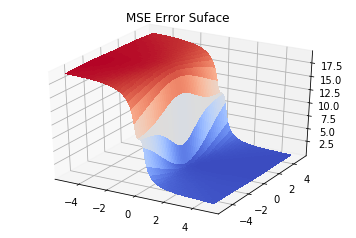

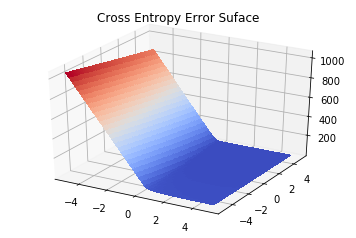

In [13]:
#Error Surface MSE
w = np.linspace(-5,5,num = 500,dtype = np.float)
b = np.linspace(-5,5,num = 500,dtype = np.float)
w,b = np.meshgrid(w,b)
mse_list = []
for i in range(w.shape[0]):
    Loss = mse(x,y,w[i],b[i])
    mse_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, mse_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('MSE Error Suface')
plt.show()
#Error Surface Cross Entropy
cross_list = []
for i in range(w.shape[0]):
    Loss = cross_entropy(x,y,w[i],b[i])
    cross_list.append(Loss)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w, b, cross_list, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title('Cross Entropy Error Suface')
plt.show()